# PROJECT PART 1

#### 0 - imports

In [242]:
import seaborn as sb
import pandas as pn
import matplotlib.pyplot as plt
import os
import numpy as np

#### 1 - process dataset

In [399]:
# 0 - take data
cpu = [ pn.read_csv("./cpu/"+c) for c in os.listdir("./cpu")]
l1d = [ pn.read_csv("./l1d/"+c) for c in os.listdir("./l1d")]
l1i = [ pn.read_csv("./l1i/"+c) for c in os.listdir("./l1i")]
l2 = [ pn.read_csv("./l2/"+c) for c in os.listdir("./l2")]
llc = [ pn.read_csv("./llc/"+c) for c in os.listdir("./llc")]
membw = [ pn.read_csv("./membw/"+c) for c in os.listdir("./membw")]
no_inference = [ pn.read_csv("./no_interference/"+c) for c in os.listdir("./no_interference") if c != ".DS_Store"]

# 1 - loop to get averages
def process_data(data):
    #p95
    avg_95 = []
    std_95 = []
    #QPS
    avg_qps = []
    std_qps = []

    #loop over rows
    for i in range(0,11):
        row_95 = []
        row_qps = []
        #loop over files
        for j in range(len(cpu)):
            row_95.append(data[j]['p95'][i])
            row_qps.append(data[j]['QPS'][i])
        avg_95.append(sum(row_95)/len(row_95))
        std_95.append(np.std(row_95))
        avg_qps.append(sum(row_qps)/len(row_qps))
        std_qps.append(np.std(row_qps))
    return avg_95,std_95,avg_qps,std_qps

avg_95_cpu,std_95_cpu,avg_qps_cpu,std_qps_cpu = process_data(cpu)
avg_95_l1d,std_95_l1d,avg_qps_l1d,std_qps_l1d = process_data(l1d)
avg_95_l1i,std_95_l1i,avg_qps_l1i,std_qps_l1i = process_data(l1i)
avg_95_l2,std_95_l2,avg_qps_l2,std_qps_l2 = process_data(l2)
avg_95_llc,std_95_llc,avg_qps_llc,std_qps_llc = process_data(llc)
avg_95_membw,std_95_membw,avg_qps_membw,std_qps_membw = process_data(membw)
avg_95_no_inference,std_95_no_inference,avg_qps_no_inference,std_qps_no_inference = process_data(no_inference)

#### 2 - PLOT NO AVG

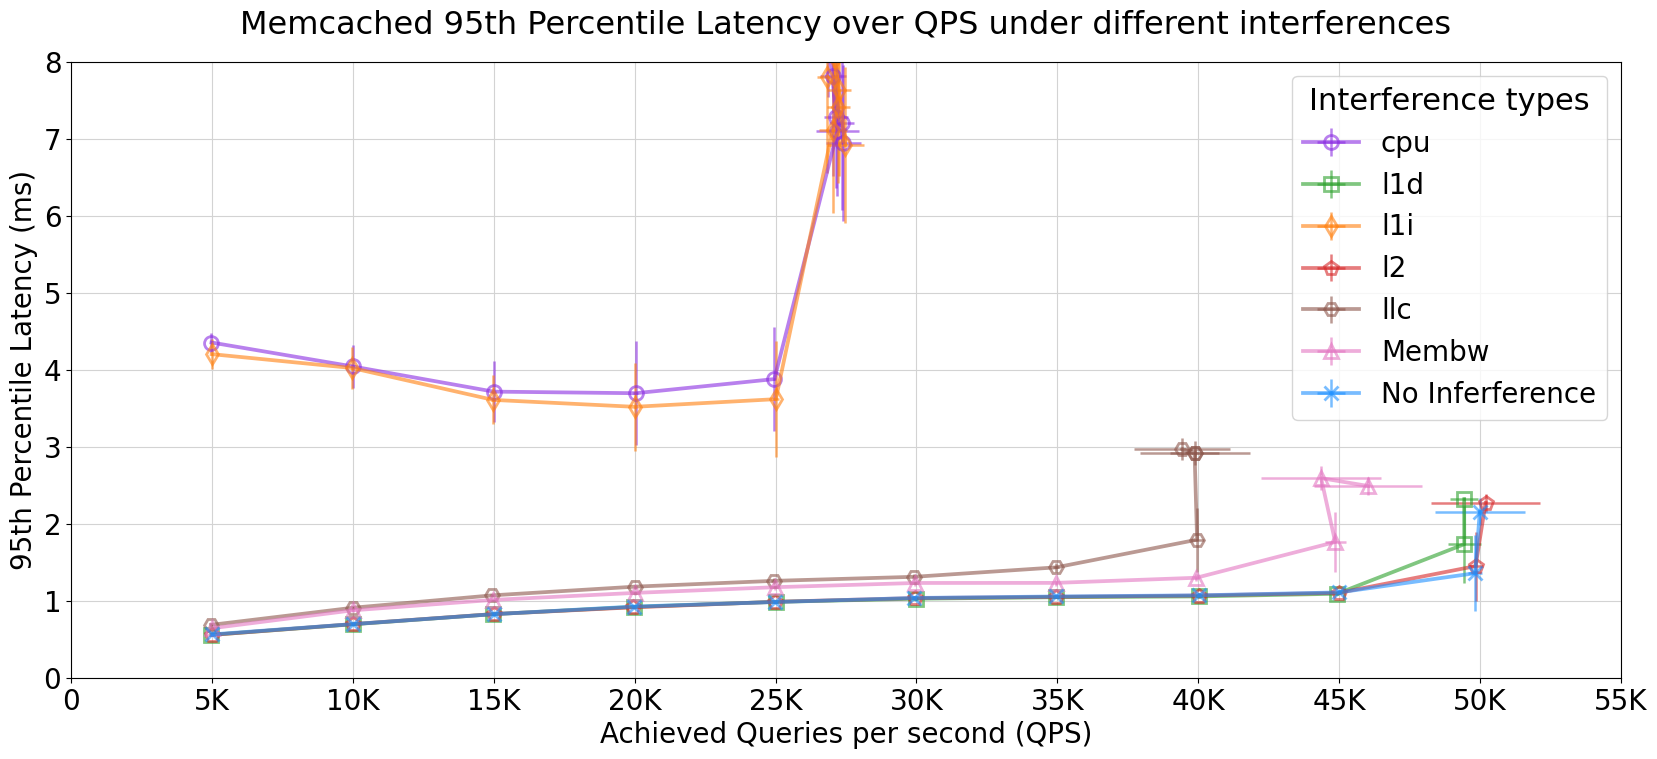

In [446]:

plt.figure(figsize=(20, 8))
plt.title("Memcached 95th Percentile Latency over QPS under different interferences",fontsize=23, pad=20)
ylabels=['0','1', '2', '3', '4', '5', '6', '7', '8']
plt.yticks(range(0,9000,1000), ylabels, fontsize=20)
xlabels=['0', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', '45K', '50K', '55K']
plt.xticks(range(0,60000,5000), xlabels, fontsize=20)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']


config = [(avg_qps_cpu, avg_95_cpu, std_qps_cpu, std_95_cpu, 'cpu', 'blueviolet','o'),
        (avg_qps_l1d, avg_95_l1d, std_qps_l1d, std_95_l1d, 'l1d', colors[2],'s'),
        (avg_qps_l1i, avg_95_l1i, std_qps_l1i, std_95_l1i, 'l1i', colors[1], 'd'),
        (avg_qps_l2, avg_95_l2, std_qps_l2, std_95_l2, 'l2',colors[3],'p'),
        (avg_qps_llc, avg_95_llc, std_qps_llc, std_95_llc, 'llc', colors[5],'H'),
        (avg_qps_membw, avg_95_membw, std_qps_membw, std_95_membw, 'Membw', colors[6], '^'),
        (avg_qps_no_inference, avg_95_no_inference, std_qps_no_inference, std_95_no_inference, 'No Inferference', 'dodgerblue', 'x')]

for avg_qps, avg_95, std_qps, std_95, label, color, m in config:
    plt.errorbar(x=avg_qps, y=avg_95, xerr=std_qps, yerr=std_95, alpha=0.6, label=label, marker=m, linewidth=2.7, markeredgewidth=2, elinewidth=1.8, markerfacecolor='none',markersize=10, color = color,)


plt.grid(True, color='lightgray')
plt.xlim(0, 55000)
plt.ylim(0, 8000)
plt.xlabel('Achieved Queries per second (QPS)', fontsize=20)
plt.ylabel('95th Percentile Latency (ms)', fontsize=20)
plt.legend(title='Interference types',fontsize=20, title_fontsize=22)
plt.show()


#### 3 - PLOT AVG

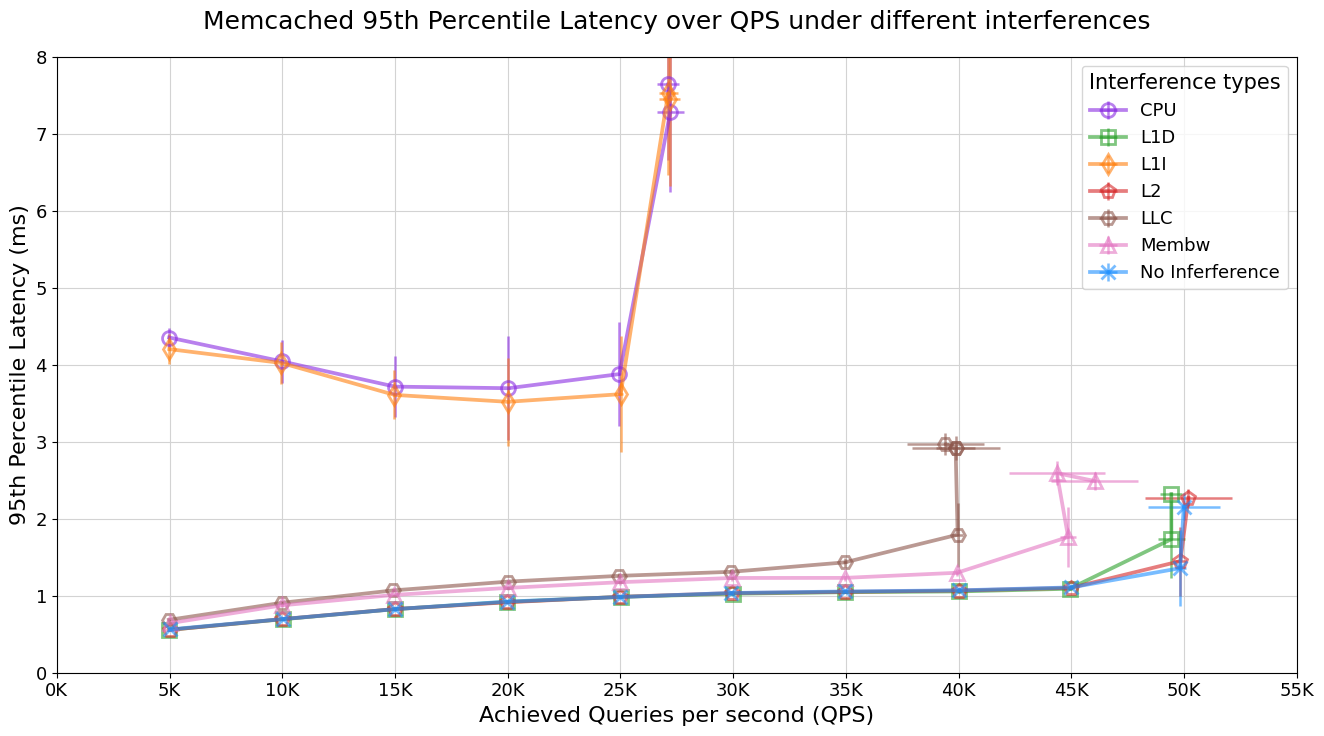

In [440]:
# 0 - take data
cpu = [ pn.read_csv("./cpu/"+c) for c in os.listdir("./cpu")]
l1d = [ pn.read_csv("./l1d/"+c) for c in os.listdir("./l1d")]
l1i = [ pn.read_csv("./l1i/"+c) for c in os.listdir("./l1i")]
l2 = [ pn.read_csv("./l2/"+c) for c in os.listdir("./l2")]
llc = [ pn.read_csv("./llc/"+c) for c in os.listdir("./llc")]
membw = [ pn.read_csv("./membw/"+c) for c in os.listdir("./membw")]
no_inference = [ pn.read_csv("./no_interference/"+c) for c in os.listdir("./no_interference") if c != ".DS_Store"]

# 1 - loop to get averages
def process_data(data):
    #p95
    avg_95 = []
    std_95 = []
    #QPS
    avg_qps = []
    std_qps = []

    #loop over rows
    for i in range(0,11):
        row_95 = []
        row_qps = []
        #loop over files
        for j in range(len(cpu)):
            
            row_95.append(data[j]['p95'][i])
            row_qps.append(data[j]['QPS'][i])
        avg_95.append(sum(row_95)/len(row_95))
        std_95.append(np.std(row_95))
        avg_qps.append(sum(row_qps)/len(row_qps))
        std_qps.append(np.std(row_qps))
    return avg_95,std_95,avg_qps,std_qps
def process_data2(a,b,c,d):
        f1 = a[0:5]
        f2=  b[0:5]
        f3= c[0:5]
        f4= d[0:5]
        
        n1,n2 = sum(a[5:8])/3,sum(a[8:])/3
        n3,n4 = sum(b[5:8])/3,sum(b[8:])/3
        n5,n6 = sum(c[5:8])/3,sum(c[8:])/3
        n7,n8 = sum(d[5:8])/3,sum(d[8:])/3
        f1.append(n1)
        f1.append(n2)
        f2.append(n3)
        f2.append(n4)
        f3.append(n5)
        f3.append(n6)
        f4.append(n7)
        f4.append(n8)
        return f1,f2,f3,f4

avg_95_cpu,std_95_cpu,avg_qps_cpu,std_qps_cpu = process_data(cpu)
avg_95_l1d,std_95_l1d,avg_qps_l1d,std_qps_l1d = process_data(l1d)
avg_95_l1i,std_95_l1i,avg_qps_l1i,std_qps_l1i = process_data(l1i)
avg_95_l2,std_95_l2,avg_qps_l2,std_qps_l2 = process_data(l2)
avg_95_llc,std_95_llc,avg_qps_llc,std_qps_llc = process_data(llc)
avg_95_membw,std_95_membw,avg_qps_membw,std_qps_membw = process_data(membw)
avg_95_no_inference,std_95_no_inference,avg_qps_no_inference,std_qps_no_inference = process_data(no_inference)

a,b,c,d = process_data2(avg_95_cpu,std_95_cpu,avg_qps_cpu,std_qps_cpu)
e,f,g,h = process_data2(avg_95_l1i,std_95_l1i,avg_qps_l1i,std_qps_l1i)


plt.figure(figsize=(16, 8))
plt.title("Memcached 95th Percentile Latency over QPS under different interferences",fontsize=18, pad=20)
ylabels=['0','1', '2', '3', '4', '5', '6', '7', '8']
plt.yticks(range(0,9000,1000), ylabels, fontsize=13)
xlabels=['0K', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', '45K', '50K', '55K']
plt.xticks(range(0,60000,5000), xlabels, fontsize=13)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

config = [(c,a,d,b, 'CPU', 'blueviolet','o'),
        (avg_qps_l1d, avg_95_l1d, std_qps_l1d, std_95_l1d, 'L1D', colors[2],'s'),
        (g,e,h,f, 'L1I', colors[1], 'd'),
        (avg_qps_l2, avg_95_l2, std_qps_l2, std_95_l2, 'L2',colors[3],'p'),
        (avg_qps_llc, avg_95_llc, std_qps_llc, std_95_llc, 'LLC', colors[5],'H'),
        (avg_qps_membw, avg_95_membw, std_qps_membw, std_95_membw, 'Membw', colors[6], '^'),
        (avg_qps_no_inference, avg_95_no_inference, std_qps_no_inference, std_95_no_inference, 'No Inferference', 'dodgerblue', 'x')]

for avg_qps, avg_95, std_qps, std_95, label, color, m in config:
    plt.errorbar(x=avg_qps, y=avg_95, xerr=std_qps, yerr=std_95, alpha=0.6, label=label, marker=m, linewidth=2.7, markeredgewidth=2, elinewidth=1.8, markerfacecolor='none',markersize=10, color = color,)


plt.grid(True, color='lightgray')
plt.xlim(0, 55000)
plt.ylim(0, 8000)
plt.xlabel('Achieved Queries per second (QPS)', fontsize=16)
plt.ylabel('95th Percentile Latency (ms)', fontsize=16)
plt.legend(title='Interference types',fontsize=13, title_fontsize=15)
plt.show()
